In [1]:
import os, sys
import pyspark

myConf=pyspark.SparkConf()
spark = pyspark.sql.SparkSession\
    .builder\
    .master("local")\
    .appName("myApp")\
    .config(conf=myConf)\
    .getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/12/08 15:08:06 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


# 변수의 성격

빅데이터는 통계와 같은 이전의 방식으로 분석하기에는 잘 맞지 않는 대규모이거나 복잡한 성격의 데이터를 말한다.

데이터는 숫자, 텍스트로 구분할 수 있다. 숫자 값은 정수나 소수로 표현되고, 년봉, 매출액, 관객수와 같이 '크다' 또는 '작다' 하는 의미가 있다. 반면에 텍스트는 분석하기 어려울 수 밖에 없고, 어떻게든 정량화하기 위해 단어의 빈도로 변환하고 있다.

측정하는 변수는 크게 나누면 다음과 같다.

(1) 명목변수 Nominal varaible는 남녀 성별과 같이 순서가 없이 이름이 있는 변수를 말한다. 검은색, 흰색, 파란색 등의 색이나 종로구, 영등포구 등 지역구가 명목변수의 예가 된다.

(2) 순위변수 Ordinal variable은 어떤 순서가 있는 범주에 속하여 그 범주의 이름을 말한다. '초등학고', '중학교', '고등학교', '대학교'와 같이 구분하여 붙인 이름이 예가 되고, 하위 학교를 마치고 나면 다음 등급으로 진학하는 순서가 있다. 소득수준을 '차상위', '중위', '상위'로 구분하면 순위변수에 해당된다.

(3) 여기서 범주를 등간격으로 간격변수 Interval variable이라고 한다. 자신의 느낌을 '좋다', '보통', '안좋다' 로 범주화하는 경우이다.

(4) 키, 몸무게와 같이 연속 변수 Continuous variable이 있다.

통계에서는 변수의 성격에 따라 적용되는 분석의 방법이 다를 수 밖에 없다. 예를 들어:

이산 값인 경우 이산분포 (주사위를 던져서 나오는 수)
빈도인 경우 포아송분포 (이산분포의 한 종류로 볼 수 있고, 단위 시간 또는 단위 공간에서 발생하는 횟수를 나타낸다. 예를 들면 특정시간에 도착하는 버스 수)
연속 값인 경우 정규분포로 모델링하여 평균, 표준편차, 확률 등의 통계량을 계산할 수 있다.

# 샘플링

### 무작위 수
통계에 무작위 수는 빼놓을 수 없는데, 분포는 무작위 수로부터 만들어 지고, 확률이 계산된다.

In [2]:
import random

random.seed(3) #시드수를 지정하면 무작위 숫자가 정해짐. 시드를 지정안하면 운영체제의 시간을 가져가 진짜 무작위 수가 만들어진다.
print("1st random number on the basis of the seed {}".format(random.random()))
print("2nd random number on the basis of the seed {}".format(random.random()))

1st random number on the basis of the seed 0.23796462709189137
2nd random number on the basis of the seed 0.5442292252959519


In [3]:
#random.seed()
random.seed()
print("1st random number on the basis of the seed {}".format(random.random()))
print("2nd random number on the basis of the seed {}".format(random.random()))

1st random number on the basis of the seed 0.3795222312818358
2nd random number on the basis of the seed 0.6806867980367157


In [4]:
# Numpy

import numpy as np

# 균등분포 상에서 무작위 숫자 만들기
print (np.random.random((3,2)))

[[0.65678289 0.56526709]
 [0.79853369 0.63213184]
 [0.53362756 0.45428659]]


In [5]:
# 정규분포 상에서 무작위 숫자 만들기
np.random.randn()

1.181340427242594

In [6]:
# 평균 0, 표준편차 1을 가지는 정규분포에서 200개 샘플
comp1=np.random.normal(0, 1, size=200)

# 평균 10, 표준편차 2, 샘플은 200의 정규분포를 생성
comp2=np.random.normal(10, 2, size=200)

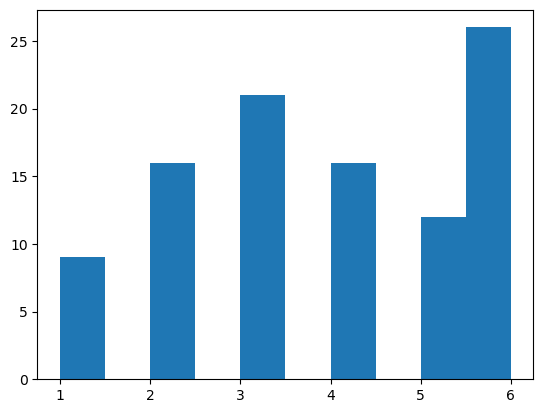

In [7]:
dice=[]
for i in range(100):
   dice.append(random.randrange(1,6+1))

import matplotlib.pyplot as plt
plt.hist(dice)
plt.show()

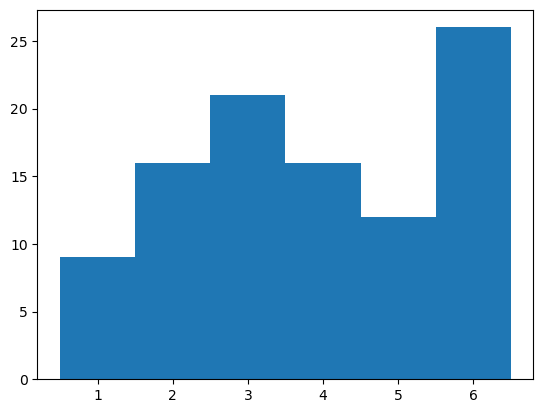

In [8]:
plt.hist(dice, bins = np.arange(0.5, 7))
plt.show()

<AxesSubplot:>

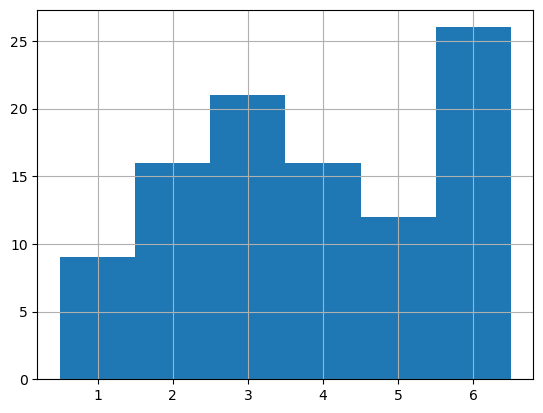

In [9]:
# Pandas로 그리기

import pandas as pd
pd.Series(dice).hist(bins = np.arange(0.5, 7))

# 히스토그램

정규분포에서 무작위 샘플을 추출하는 randn()을 사용해서 histogram 그래프를 그려보자. 정규분포 샘플을 무작위로 100개 생성해보자.

In [10]:
x=np.random.randn(100)
count, binends = np.histogram(x)
print(count)
print(binends)

[ 3  5  5  9 12 27 20 13  4  2]
[-2.77303596 -2.27611437 -1.77919277 -1.28227118 -0.78534959 -0.288428
  0.2084936   0.70541519  1.20233678  1.69925837  2.19617997]


(array([ 3.,  5.,  5.,  9., 12., 27., 20., 13.,  4.,  2.]),
 array([-2.77303596, -2.27611437, -1.77919277, -1.28227118, -0.78534959,
        -0.288428  ,  0.2084936 ,  0.70541519,  1.20233678,  1.69925837,
         2.19617997]),
 <BarContainer object of 10 artists>)

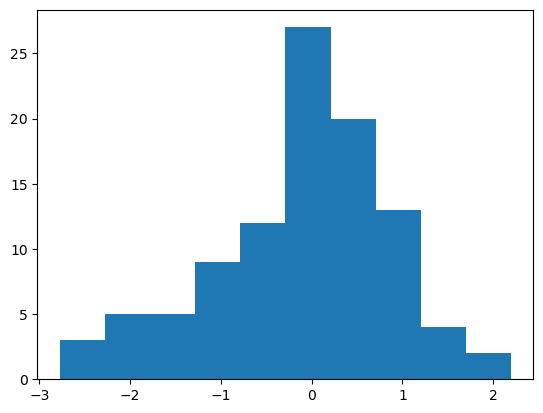

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(x)

<AxesSubplot:>

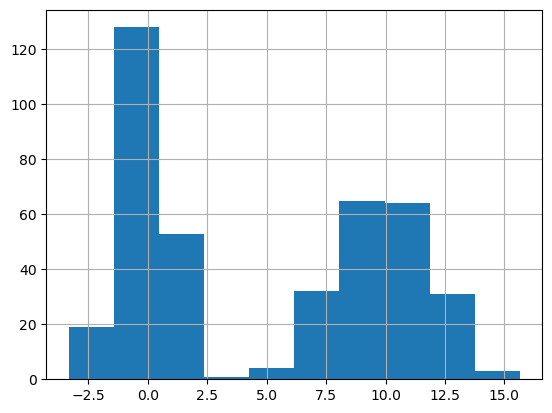

In [12]:
# 정규분포 두개를 Series로 만들어 만들기

values=pd.Series(np.concatenate( [comp1,comp2]))
values.hist()

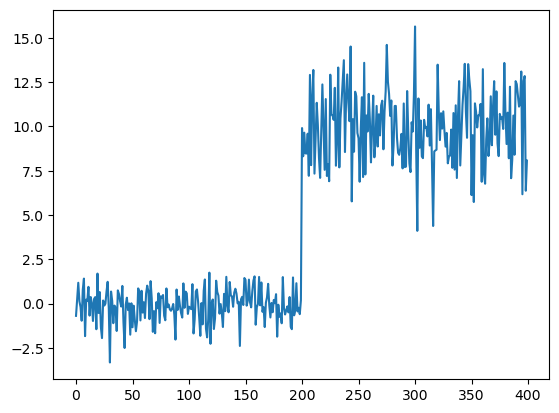

In [13]:
values.plot()
plt.show()

# 문제 S-1: 년도별 빈도 히스토그램
빈도와 날자가 저장된 데이터에서 막대그래프를 그려보자. 아래 데이터의 첫 컬럼은 빈도, 둘째 컬럼은 날자이다. 막대그래프는 histogram, barchart를 선택할 수 있다.

histogram은 한 변수(컬럼)의 빈도수.
barchart는 두 변수간의 그래프.

In [14]:
data = """30 14-11-2003
10 15-03-2004
12 04-12-2012
33 09-05-2007
44 16-08-2005
55 25-07-2001
76 31-12-2011
87 25-06-2009
118 16-02-2006
119 10-02-2000
145 03-05-2014"""

In [15]:
import datetime

yvalues = []
xdates = []
for line in data.split("\n"):
    x, y = line.split()
    yvalues.append(int(x))
    xdates.append(datetime.datetime.strptime(y, "%d-%m-%Y").date())

<BarContainer object of 11 artists>

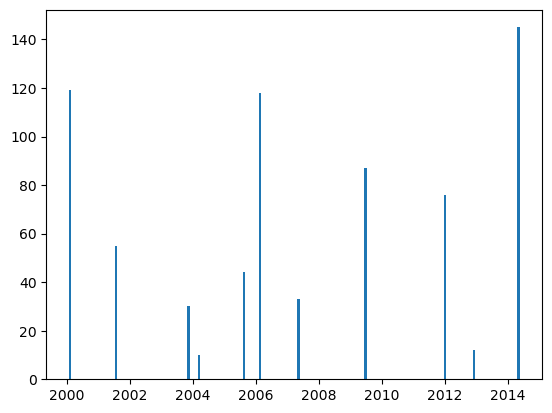

In [16]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111) #3개의 숫자
ax.bar(xdates, yvalues, width=30)

### boxplot
전체 관측값을 정렬하고, 전체를 4분위로 나누면 IQR Interquatile Range을 구할 수 있다. 
Boxplot은 IQR의 Q1~Q3을 사각형으로 표시한다. pandas를 이용하거나, matplotlib으로 Boxplot을 그릴 수 있다. 
사각형의 주황색 선은 평균을 말한다.

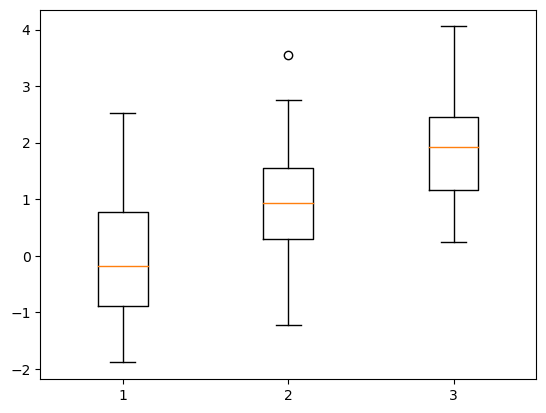

In [17]:
import matplotlib.pyplot as plt

x1 = np.random.normal(0,1,50) # mu=0, sigma=1, n=50
x2 = np.random.normal(1,1,50)
x3 = np.random.normal(2,1,50)
plt.boxplot([x1,x2,x3])
plt.show()

# 중심극한정리
무작위로 평균 , 표준편차, 모집단이 있다고 하자. 모집단의 평균과 표준편차는 계산할 방법이 없어서 알 수가 없다. 표본을 추출하면, 모집단의 평균을 구할 수 있고, 모집단의 표준편차는 표본의 표준편차를 크기로 나누어 계산할 수 있다

In [18]:
x=np.random.randn(100)
print ("mean\t: {}".format(np.mean(x)))
print ("median\t: {}".format(np.median(x)))

# 정규분포는 평균, 모드, 최빈값이 같아야 한다. 
# 아래는 평균은 0에 가깝고, 최빈값과 다소 차이가 있다. 정규분포의 솟거나, 퍼진 모양이 다르기 때문이다.

mean	: -0.017527320155045947
median	: 0.016258134146254256


### skewness
분포의 대칭성을 설명하는 지표로 skewness를 계산한다.  
= 0 : 정규분포  
&lt; 0 : +이면 +방향으로 꼬리가 있다. 왼쪽으로 피크가 있다.  
&gt; 0 : -이면 -방향으로 꼬리가 있다. 오른쪽으로 피크가 있다.  

In [19]:
from scipy.stats import skew

print ("skewness\t: {}".format(skew(x)))

skewness	: -0.12575118692231646


### kurtosis
kurtosis는 분포의 뾰족한 정도를 설명한다.
= 0 : 정규분포  
&lt; 0 : 뾰족, 꼬리가 두툼
&gt; 0 : 편평, 꼬리가 얇음

In [20]:
from scipy.stats import kurtosis

print ("kurtosis\t: {}".format(kurtosis(x)))

kurtosis	: -0.6845839226867683


## Spark DF with numpy array

In [21]:
import pandas as pd

x=np.random.randn(100)
xPd=pd.DataFrame(x, columns=['x'], dtype=float)


In [22]:
from pyspark.sql import functions as f

df=spark.createDataFrame(xPd)

df.select(f.skewness(df['x']), f.kurtosis(df['x'])).show()

+--------------------+-------------------+
|         skewness(x)|        kurtosis(x)|
+--------------------+-------------------+
|-0.00931274018605...|-0.6973612962959876|
+--------------------+-------------------+



### 평균

In [23]:
X=x

print ("simple mean of x = {:.3f}".format(float(sum(X))/len(X)))

xbar=np.mean(X)
print ("numpy mean of X = {:.3f}".format(xbar))

simple mean of x = -0.114
numpy mean of X = -0.114


### 분산

분산 variance나 표준편차 Standard Deviation은 평균으로부터 얼마나 멀리 떨어져 또는 흩어져 분포하는지 알려주는 값이다.

- 분산은 평균에서 관측값을 뺀 차이값을 제곱한 후, n으로 나누어 평균을 계산한다. 제곱을 하지 않고 차이값을 더하면 0이 나오므로 제곱을 한다.
- 분산을 제곱근하면 표준편차가 된다.
- 분산보다는 표준편차가 더 자주 사용된다.

In [24]:
X=x

#식으로 표현하기
print(np.sqrt(sum( [ (x-xbar)**2 for x in X ] )/len(X))) # ddof=0

1.0058354318512763


In [25]:
# 자유도 반영
print(np.sqrt(sum( [ (x-xbar)**2 for x in X ] )/(len(X)-1))) # ddof=1

1.0109026449381129


In [26]:
# Numpy로 계산하기

print(np.std(X)) # ddof=0
print(np.std(X, ddof=1))

1.0058354318512766
1.010902644938113


### Z-Score (Nomalization)

표준편차의 배수로 떨어진 정도를 정규화(표준화) 할 때 사용하는 지표

In [27]:
# 계산식

import numpy as np

xbar=np.mean(X)
sigmax=np.std(X) #ddof=0
sx=np.std(X,ddof=1)
for x in X:
    #zscore=(x-xbar)/sx
    zscore=(x-xbar)/sigmax
    print (zscore, end= ' ')

1.9683126427775262 0.8021126389707397 -0.32716638221777833 -1.404874567256679 1.6348223385250629 1.1641609494305194 -2.007495667982908 -0.3685100792525085 -0.9733206982922539 -0.12265629106836995 -0.49969130845500104 0.9316724112537222 -1.5735634088519947 0.4700420131157194 -0.5075416103468303 -0.17211751904951006 0.9309994836054631 -2.225734520487875 -0.3306393554158819 1.1480116776057019 -0.45767647840155723 1.6550275797854928 -1.0991566881424635 0.33017084284312614 0.2901206806983155 0.31805019745556495 -1.2370748219996393 0.6348981552169493 0.08015634024028374 -0.28859918899048037 0.506417124353152 -0.5506144087202519 -0.14890844589235017 1.5424744506166783 1.1073529612537532 0.026767472996427264 0.3905810013060436 -1.7907092657794972 -1.5209852715637397 0.08225687255329828 -1.4649825979987185 -0.2950989912998644 1.7959643082187386 0.9303746552751555 -1.3690347675477663 -0.327734180531681 -0.9517298343831859 -1.4524408244240783 0.43658335040991136 -0.6728498573771693 0.243785079512

In [28]:
# zscore()는 scipy.stats에서 제공하고 있다.

from scipy import stats
stats.zscore(X)

array([ 1.96831264,  0.80211264, -0.32716638, -1.40487457,  1.63482234,
        1.16416095, -2.00749567, -0.36851008, -0.9733207 , -0.12265629,
       -0.49969131,  0.93167241, -1.57356341,  0.47004201, -0.50754161,
       -0.17211752,  0.93099948, -2.22573452, -0.33063936,  1.14801168,
       -0.45767648,  1.65502758, -1.09915669,  0.33017084,  0.29012068,
        0.3180502 , -1.23707482,  0.63489816,  0.08015634, -0.28859919,
        0.50641712, -0.55061441, -0.14890845,  1.54247445,  1.10735296,
        0.02676747,  0.390581  , -1.79070927, -1.52098527,  0.08225687,
       -1.4649826 , -0.29509899,  1.79596431,  0.93037466, -1.36903477,
       -0.32773418, -0.95172983, -1.45244082,  0.43658335, -0.67284986,
        0.24378508, -1.79093205,  0.7666799 , -0.5167267 ,  0.66961977,
        1.30162474, -0.50785962,  0.18025652, -0.81966131,  0.98809065,
        0.81886574,  0.019055  , -0.31388835, -1.62119774, -0.21680829,
       -0.19427216,  0.95050639,  0.32647304,  1.84413065, -0.36

### cdf - 누적확률계산
추론통계에서 확률을 계산하는 것은 중요하다. p-value와 신뢰구간의 계산에 필요하다. 
cdf Cumulative Distribution Function은 누적확률을 의미한다. 
정규분포에서 평균 loc=0, 표준편차 scale=1을 기본 값으로, cdf(0)은 '0'또는 그 이하의 값을 누적한 확률을 말한다.

In [29]:
from scipy.stats import norm

norm.cdf(0, loc=0, scale=1)

0.5

In [30]:
 norm.cdf(1) - norm.cdf(-1) #모집단의 68.27

0.6826894921370859

In [31]:
norm.cdf(2) - norm.cdf(-2) #모집단 95%

0.9544997361036416

### tscore
표본의 크기가 크면 모집단과 차이가 없는데, 표본이 작으면 어떻게 될까? 이 경우 사용하는 것이 t분포이다.   
t분포는 정규분포와 유사한 모양을 가지고 있지만, 꼬리가 두툼한 특징을 가지고 있다.    
따라서 평균에서 멀어진 값을 샘플링할 확률이 높아지게 된다. n이 일정 규모로 커지면 t분포와 정규분포와 유사하게 된다.   

In [32]:
from scipy.stats import t

t.cdf(1, 1) # dof 1

0.7500000000000002

# Outlier

정규분포를 따른다고 했을 경우, 분포의 표준편차 범위 -3 ~ 3안에 99.7%가 포함되고 그 밖의 값은 0.3%에 불과하여 발생하기 극히 어렵다. 이러한 일정 범위를 넘어선 값은 이상값이다.   

이상값은 분석에 영향을 미치며, 몸무게-키의 회귀분석선을 생각해보면 이상 몸무게는 선을 틀어지게 한다.

In [33]:
import numpy as np

def filterOutliers(data):
    m = np.mean(data)
    s = np.std(data)
    filtered = [d for d in data if (m - 2 * s < d < m + 2 * s)]
    return filtered

d = [2,4,5,1,6,5,40]
filtered_d = filterOutliers(d)
print (filtered_d)


# 40은 Outlier로 판단하여 전처리하여 제외한다.

[2, 4, 5, 1, 6, 5]


# Window functions
window 함수는 윈도우를 정의하고 윈도우 함수를 적용하는 데 사용된다.

윈도우 함수는 윈도우별 일종의 집단으로 구분하고 (partitionBy) 그 범위 내에서 계산을 할 때 사용한다. 이 때 over() 함수로 적용되는 그룹의 윈도우를 구분하게 된다.

'''groupBy는 컬럼별 연산이고 컬럼데이터 그룹화와 집계에 사용되며 범주형 데이터를 처리하는 데 유용하다.'''<br>
'''window는 행 별로 연산을 수행하고 시간적 또는 순서적 데이터에 적합하다. 순위를 매길 때에 유용'''

- 순위 함수 ranking functions: rank, dense_rank, percent_rank, ntile, row_number
- 분석 함수 analytic functions: cume_dist, first_value, last_value, lag, lead
- 집합 함수 aggregate functions: sum, avg, min, max, count와 같이 앞서 배웠던 집합 함수를 윈도우에 대해 적용.

### GroupBy 사용 케이스

In [34]:

marks=[
    "김하나, English, 100",
    "김하나, Math, 80",
    "임하나, English, 70",
    "임하나, Math, 100",
    "김갑돌, English, 82.3",
    "김갑돌, Math, 98.5",
#     "김갑순, Math, 90"
]

_marksRdd=spark.sparkContext.parallelize(marks).map(lambda x:x.split(','))
_marksDf=spark.createDataFrame(_marksRdd, schema=["name", "subject", "mark"])
_marksDf.show()
_marksDf.groupBy('subject').count().show()

+------+--------+-----+
|  name| subject| mark|
+------+--------+-----+
|김하나| English|  100|
|김하나|    Math|   80|
|임하나| English|   70|
|임하나|    Math|  100|
|김갑돌| English| 82.3|
|김갑돌|    Math| 98.5|
+------+--------+-----+

+--------+-----+
| subject|count|
+--------+-----+
|    Math|    3|
| English|    3|
+--------+-----+



# window 함수 사용
컬럼에 대해 그룹, 즉 윈도우를 만드는 함수를 보자.

In [35]:
from pyspark.sql.window import Window

# Window 스펙 정의 및 생성

win = Window.partitionBy("subject").orderBy("mark") 
# (한글일 경우) Window().partitionBy(['호선명']).orderBy(F.desc('유임승차인원'))

# PartitionBy : 컬럼별로 구분
# orderBy : partion 내에서 컬럼에 대한 행의 순서 결정
# Dataframe의 subject(과목)별 mark(점수)로 학생들(Row)들의 순위를 매긴다.

win

In [36]:
from pyspark.sql.functions import row_number

# 순위 함수 : row_number() 그룹별로 일련번호를 생성
_marksDf.withColumn("row_number", row_number().over(win)).show()

+------+--------+-----+----------+
|  name| subject| mark|row_number|
+------+--------+-----+----------+
|김하나| English|  100|         1|
|임하나| English|   70|         2|
|김갑돌| English| 82.3|         3|
|임하나|    Math|  100|         1|
|김하나|    Math|   80|         2|
|김갑돌|    Math| 98.5|         3|
+------+--------+-----+----------+



### 형 변환 -> OrderBy를 사용하기 위해서

In [37]:
from pyspark.sql.types import FloatType
from pyspark.sql import functions as F
from pyspark.sql.functions import row_number

# mark(String) 형변환 -> markF(Float)
_marksDf = _marksDf.withColumn('markF', _marksDf['mark'].cast(FloatType()))

# 형변환한 컬럼으로 정렬하는 Window Function 생성
winF = Window.partitionBy("subject").orderBy(F.col("markF").desc()) # orderby 'float markF'


_marksDf.withColumn("row_number", row_number().over(winF)).show()

+------+--------+-----+-----+----------+
|  name| subject| mark|markF|row_number|
+------+--------+-----+-----+----------+
|김하나| English|  100|100.0|         1|
|김갑돌| English| 82.3| 82.3|         2|
|임하나| English|   70| 70.0|         3|
|임하나|    Math|  100|100.0|         1|
|김갑돌|    Math| 98.5| 98.5|         2|
|김하나|    Math|   80| 80.0|         3|
+------+--------+-----+-----+----------+



In [38]:
# rank() 윈도우 함수는 각 그룹별로 등위를 계산
from pyspark.sql.functions import rank

_marksDf.withColumn("rank", rank().over(winF)).show()

+------+--------+-----+-----+----+
|  name| subject| mark|markF|rank|
+------+--------+-----+-----+----+
|김하나| English|  100|100.0|   1|
|김갑돌| English| 82.3| 82.3|   2|
|임하나| English|   70| 70.0|   3|
|임하나|    Math|  100|100.0|   1|
|김갑돌|    Math| 98.5| 98.5|   2|
|김하나|    Math|   80| 80.0|   3|
+------+--------+-----+-----+----+



In [39]:
# 누적분포 출력
from pyspark.sql.functions import cume_dist

_marksDf.withColumn("cume_dist", cume_dist().over(winF)).show()

+------+--------+-----+-----+------------------+
|  name| subject| mark|markF|         cume_dist|
+------+--------+-----+-----+------------------+
|김하나| English|  100|100.0|0.3333333333333333|
|김갑돌| English| 82.3| 82.3|0.6666666666666666|
|임하나| English|   70| 70.0|               1.0|
|임하나|    Math|  100|100.0|0.3333333333333333|
|김갑돌|    Math| 98.5| 98.5|0.6666666666666666|
|김하나|    Math|   80| 80.0|               1.0|
+------+--------+-----+-----+------------------+



In [40]:
from pyspark.sql.functions import lag

_marksDf.withColumn("lag", lag('mark', 1).over(winF)).show()

+------+--------+-----+-----+-----+
|  name| subject| mark|markF|  lag|
+------+--------+-----+-----+-----+
|김하나| English|  100|100.0| null|
|김갑돌| English| 82.3| 82.3|  100|
|임하나| English|   70| 70.0| 82.3|
|임하나|    Math|  100|100.0| null|
|김갑돌|    Math| 98.5| 98.5|  100|
|김하나|    Math|   80| 80.0| 98.5|
+------+--------+-----+-----+-----+



In [41]:
from pyspark.sql.functions import lead

_marksDf.withColumn("lead", lead('mark', 1).over(winF)).show()

+------+--------+-----+-----+-----+
|  name| subject| mark|markF| lead|
+------+--------+-----+-----+-----+
|김하나| English|  100|100.0| 82.3|
|김갑돌| English| 82.3| 82.3|   70|
|임하나| English|   70| 70.0| null|
|임하나|    Math|  100|100.0| 98.5|
|김갑돌|    Math| 98.5| 98.5|   80|
|김하나|    Math|   80| 80.0| null|
+------+--------+-----+-----+-----+



# Aggregate Functions
합계, 최대, 최소와 같은 그룹으로 묶어 계산하는 경우, 정렬할 필요가 없다. 즉 partitionBy() 하면서, orderBy()는 하지 않는다.

mark가 string으로 설정되어 있다고 평균, 합계, 최소, 최대 함수가 어떻게 출력될까? 문제 없이 실행되지만, 결과는 올바르지 않다. 데이터타입은 항상 주의해야 한다.

In [42]:
winAgg  = Window.partitionBy("subject")
from pyspark.sql import functions as F
_marksDf.withColumn("avg", F.avg(F.col("markF")).over(winAgg))\
    .withColumn("sum", F.sum(F.col("markF")).over(winAgg))\
    .withColumn("min", F.min(F.col("markF")).over(winAgg))\
    .withColumn("max", F.max(F.col("markF")).over(winAgg))\
    .show()

+------+--------+-----+-----+-----------------+-----------------+----+-----+
|  name| subject| mark|markF|              avg|              sum| min|  max|
+------+--------+-----+-----+-----------------+-----------------+----+-----+
|김하나| English|  100|100.0|84.10000101725261|252.3000030517578|70.0|100.0|
|임하나| English|   70| 70.0|84.10000101725261|252.3000030517578|70.0|100.0|
|김갑돌| English| 82.3| 82.3|84.10000101725261|252.3000030517578|70.0|100.0|
|김하나|    Math|   80| 80.0|92.83333333333333|            278.5|80.0|100.0|
|임하나|    Math|  100|100.0|92.83333333333333|            278.5|80.0|100.0|
|김갑돌|    Math| 98.5| 98.5|92.83333333333333|            278.5|80.0|100.0|
+------+--------+-----+-----+-----------------+-----------------+----+-----+



# 문제: zscore, cdf 계산
성적데이터는 n이 적지만, 정규분포를 이룬다고 가정하자.

- 성적데이터로 DataFrame을 생성.
- zscore 컬럼을 생성.

zscore를 계산하려면, 평균과 표준편차를 알아야 한다. 계산식에 F함수를 직접 사용하면 오류가 발생한다. 따로 평균과 표준편차를 구해서 계산식에서 사용해야 한다.

- cdf 컬럼을 생성.
scipy.stats.norm.cdf() 함수는 데이터타입을 float로 맞추어 주어야 한다. cdf는 평균=0, 표준편차=1을 기본 값으로 누적확률을 계산한다.

### 1. 평균과 표준편차 구하기

In [43]:
from pyspark.sql import functions as F

_markStats = _marksDf.select(
    F.mean('markF').alias('mean'),
    F.stddev('markF').alias('std')
).collect()

meanMark = _markStats[0]['mean']
stdMark = _markStats[0]['std']
print(meanMark, stdMark)

88.46666717529297 12.786190172956093


### 2. z-score 계산

In [44]:
from pyspark.sql import functions as F
from pyspark.sql.types import FloatType

#UDF 함수 정의 -> FloatType 형변환
zscoreUdf = F.udf(lambda x: (x-meanMark)/stdMark, FloatType()) # return as FloatType 

_marksDf=_marksDf.withColumn("zscore", zscoreUdf(_marksDf['markF']))
_marksDf.show()

+------+--------+-----+-----+-----------+
|  name| subject| mark|markF|     zscore|
+------+--------+-----+-----+-----------+
|김하나| English|  100|100.0|  0.9020148|
|김하나|    Math|   80| 80.0| -0.6621728|
|임하나| English|   70| 70.0| -1.4442666|
|임하나|    Math|  100|100.0|  0.9020148|
|김갑돌| English| 82.3| 82.3|-0.48229098|
|김갑돌|    Math| 98.5| 98.5| 0.78470075|
+------+--------+-----+-----+-----------+



### 3. CDF 계산 (zscore 이용)

In [45]:
from scipy.stats import norm
from pyspark.sql import functions as F
from pyspark.sql.types import FloatType
type(norm.cdf(1)) #정규분포


#UDF 함수 정의
#bad_norm_cdf = F.udf(lambda x: norm.cdf(x), FloatType()) # FloatType() does not work
normCdf = F.udf(lambda x: float(norm.cdf(x))) # FloatType() does not work

_marksDf=_marksDf.withColumn("cdf", normCdf(_marksDf['zscore']))
_marksDf.show()

+------+--------+-----+-----+-----------+-------------------+
|  name| subject| mark|markF|     zscore|                cdf|
+------+--------+-----+-----+-----------+-------------------+
|김하나| English|  100|100.0|  0.9020148| 0.8164754981807292|
|김하나|    Math|   80| 80.0| -0.6621728| 0.2539302463290559|
|임하나| English|   70| 70.0| -1.4442666| 0.0743320011235712|
|임하나|    Math|  100|100.0|  0.9020148| 0.8164754981807292|
|김갑돌| English| 82.3| 82.3|-0.48229098|0.31479962882028223|
|김갑돌|    Math| 98.5| 98.5| 0.78470075| 0.7836854740814176|
+------+--------+-----+-----+-----------+-------------------+



### Window 함수를 이용한 Z-score 계산

In [46]:
import sys
from pyspark.sql import functions as F
from pyspark.sql.window import Window


byAll = Window.rowsBetween(-sys.maxsize, sys.maxsize) #최대, 최소 값의 윈도우


# 평균, 표준편차
_marksDf = _marksDf.withColumn("mean", F.avg(_marksDf['markF']).over(byAll))
_marksDf = _marksDf.withColumn("stddev", F.stddev(_marksDf['markF']).over(byAll))

bySubject = Window.partitionBy('subject')
_marksDf = _marksDf.withColumn("meanBySubject", F.avg(_marksDf['markF']).over(bySubject))

_marksDf.show(_marksDf.count(), truncate=False)

+------+--------+-----+-----+-----------+-------------------+-----------------+------------------+-----------------+
|name  |subject |mark |markF|zscore     |cdf                |mean             |stddev            |meanBySubject    |
+------+--------+-----+-----+-----------+-------------------+-----------------+------------------+-----------------+
|김하나| English| 100 |100.0|0.9020148  |0.8164754981807292 |88.46666717529297|12.786190172956093|84.10000101725261|
|임하나| English| 70  |70.0 |-1.4442666 |0.0743320011235712 |88.46666717529297|12.786190172956093|84.10000101725261|
|김갑돌| English| 82.3|82.3 |-0.48229098|0.31479962882028223|88.46666717529297|12.786190172956093|84.10000101725261|
|김하나| Math   | 80  |80.0 |-0.6621728 |0.2539302463290559 |88.46666717529297|12.786190172956093|92.83333333333333|
|임하나| Math   | 100 |100.0|0.9020148  |0.8164754981807292 |88.46666717529297|12.786190172956093|92.83333333333333|
|김갑돌| Math   | 98.5|98.5 |0.78470075 |0.7836854740814176 |88.46666717529297|12.

23/12/08 15:08:16 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/12/08 15:08:16 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/12/08 15:08:16 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/12/08 15:08:16 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/12/08 15:08:17 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/12/08 15:08:17 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/12/08 1

In [47]:
_marksDf = _marksDf.withColumn("zscore1", (F.col('markF')-F.col('mean'))/F.col('stddev'))
_marksDf.select('zscore', 'zscore1').show(_marksDf.count())

+-----------+-------------------+
|     zscore|            zscore1|
+-----------+-------------------+
|  0.9020148|  0.902014804151829|
| -0.6621728| -0.662172786480269|
| -1.4442666| -1.444266581796318|
|  0.9020148|  0.902014804151829|
|-0.48229098|-0.4822909748814927|
| 0.78470075| 0.7847007348544217|
+-----------+-------------------+



23/12/08 15:08:17 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/12/08 15:08:17 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/12/08 15:08:17 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/12/08 15:08:17 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/12/08 15:08:17 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/12/08 15:08:17 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/12/08 1

### 전체의 평균, 표준편차 컬럼을 만들지 않고 계산

또는 직접 Window 함수를 직접 사용하여 zscore를 계산할 수도 있다.

In [48]:
_marksDf = _marksDf.withColumn("zscore2", (F.col('markF')-F.avg('markF').over(byAll))/F.stddev('markF').over(byAll))
_marksDf.select('zscore', 'zscore1', 'zscore2').show()

23/12/08 15:08:17 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/12/08 15:08:17 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/12/08 15:08:17 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/12/08 15:08:17 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/12/08 15:08:17 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/12/08 15:08:17 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/12/08 1

+-----------+-------------------+-------------------+
|     zscore|            zscore1|            zscore2|
+-----------+-------------------+-------------------+
|  0.9020148|  0.902014804151829|  0.902014804151829|
| -0.6621728| -0.662172786480269| -0.662172786480269|
| -1.4442666| -1.444266581796318| -1.444266581796318|
|  0.9020148|  0.902014804151829|  0.902014804151829|
|-0.48229098|-0.4822909748814927|-0.4822909748814927|
| 0.78470075| 0.7847007348544217| 0.7847007348544217|
+-----------+-------------------+-------------------+



# 문제: 2020년 8월 서울시 지하철호선별 역별 승하차 인원 정보
'서울시 지하철호선별 역별 승하차 인원 정보'를 검색하거나, https://data.seoul.go.kr/dataList/OA-12914/S/1/datasetView.do 사이트를 방문한다. 분석할 파일은 'CARD_SUBWAY_MONTH_202008.csv'이다. 문제를 풀고 결과 출력을 예시해 놓았다. 동일하지 않아도 유사하게 출력하면 된다.

DataFrame 생성하고, 스키마는 자동인식하여 출력
컬럼명을 변경하고, 스키마 출력

In [49]:
_subDf = spark\
    .read\
    .options(header='true', inferschema='true', delimiter=',')\
    .csv(os.path.join('data', 'CARD_SUBWAY_MONTH_202310.csv'))

In [50]:
_subDf.printSchema()

root
 |-- 사용일자: integer (nullable = true)
 |-- 노선명: string (nullable = true)
 |-- 역명: string (nullable = true)
 |-- 승차총승객수: integer (nullable = true)
 |-- 하차총승객수: integer (nullable = true)
 |-- 등록일자: integer (nullable = true)



In [51]:
# 컬럼 명 변경
_subDf=_subDf\
    .withColumnRenamed("사용일자", "dateUse")\
    .withColumnRenamed("노선명", "line")\
    .withColumnRenamed("역명", "station")\
    .withColumnRenamed("승차총승객수", "NInPassengers")\
    .withColumnRenamed("하차총승객수", "NOutPassengers")\
    .withColumnRenamed("등록일자", "dateRegi")
_subDf.printSchema()

root
 |-- dateUse: integer (nullable = true)
 |-- line: string (nullable = true)
 |-- station: string (nullable = true)
 |-- NInPassengers: integer (nullable = true)
 |-- NOutPassengers: integer (nullable = true)
 |-- dateRegi: integer (nullable = true)



In [52]:
# 일자 형변환
from pyspark.sql import functions as F
from pyspark.sql.types import DateType, StringType
from pyspark.sql import functions as functions

_subDf=_subDf.withColumn("dateStr", F.col('dateUse').cast(StringType()))
_subDf=_subDf.withColumn("Date", F.to_date('dateStr', 'yyyyMMdd'))
_subDf.show(3)

+--------+------+--------------+-------------+--------------+--------+--------+----------+
| dateUse|  line|       station|NInPassengers|NOutPassengers|dateRegi| dateStr|      Date|
+--------+------+--------------+-------------+--------------+--------+--------+----------+
|20231001|장항선|신창(순천향대)|         1239|          1223|20231004|20231001|2023-10-01|
|20231001|중앙선|          용문|         2594|          2176|20231004|20231001|2023-10-01|
|20231001|중앙선|          지평|           79|            73|20231004|20231001|2023-10-01|
+--------+------+--------------+-------------+--------------+--------+--------+----------+
only showing top 3 rows



In [53]:
# Timestamp로 변환

from pyspark.sql import functions as F

_subDf.withColumn("Date", F.to_date(F.from_unixtime(F.unix_timestamp('dateStr', 'yyyyMMdd')))).show(3)

+--------+------+--------------+-------------+--------------+--------+--------+----------+
| dateUse|  line|       station|NInPassengers|NOutPassengers|dateRegi| dateStr|      Date|
+--------+------+--------------+-------------+--------------+--------+--------+----------+
|20231001|장항선|신창(순천향대)|         1239|          1223|20231004|20231001|2023-10-01|
|20231001|중앙선|          용문|         2594|          2176|20231004|20231001|2023-10-01|
|20231001|중앙선|          지평|           79|            73|20231004|20231001|2023-10-01|
+--------+------+--------------+-------------+--------------+--------+--------+----------+
only showing top 3 rows



### 4) 노선명별 승하차총승객수

In [54]:
_subDf.groupBy('line').agg({"NInPassengers":"sum"}).show(3)
_subDf.groupBy('line').agg(F.sum("NOutPassengers")).show(3)

#나란히 출력
_subDf.groupBy('line').agg(F.sum("NInPassengers")\
                           .alias("승차인원합계"), F.sum("NOutPassengers").alias("하차인원합계")).show(3)

+------+------------------+
|  line|sum(NInPassengers)|
+------+------------------+
|일산선|           3355783|
|장항선|            592001|
|경부선|          14149336|
+------+------------------+
only showing top 3 rows

+------+-------------------+
|  line|sum(NOutPassengers)|
+------+-------------------+
|일산선|            3221699|
|장항선|             561132|
|경부선|           13949276|
+------+-------------------+
only showing top 3 rows

+------+------------+------------+
|  line|승차인원합계|하차인원합계|
+------+------------+------------+
|일산선|     3355783|     3221699|
|장항선|      592001|      561132|
|경부선|    14149336|    13949276|
+------+------------+------------+
only showing top 3 rows



### 5) 노선별 승하차합계가 가장 높은 역을 출력 (모든 노선 출력)

In [55]:
_subDf=_subDf.withColumn("SumInOut", F.col("NInPassengers") +F.col("NOutPassengers"))
_subDf.show(3)

+--------+------+--------------+-------------+--------------+--------+--------+----------+--------+
| dateUse|  line|       station|NInPassengers|NOutPassengers|dateRegi| dateStr|      Date|SumInOut|
+--------+------+--------------+-------------+--------------+--------+--------+----------+--------+
|20231001|장항선|신창(순천향대)|         1239|          1223|20231004|20231001|2023-10-01|    2462|
|20231001|중앙선|          용문|         2594|          2176|20231004|20231001|2023-10-01|    4770|
|20231001|중앙선|          지평|           79|            73|20231004|20231001|2023-10-01|     152|
+--------+------+--------------+-------------+--------------+--------+--------+----------+--------+
only showing top 3 rows



In [56]:
# 승하차인원 순위
from pyspark.sql.window import Window
from pyspark.sql import functions as F

_subDf.withColumn("sumNIn", F.rank()\
                  .over(Window().partitionBy(['line']).orderBy(F.col("SumInOut").desc()))).show(3)

+--------+-----+-------+-------------+--------------+--------+--------+----------+--------+------+
| dateUse| line|station|NInPassengers|NOutPassengers|dateRegi| dateStr|      Date|SumInOut|sumNIn|
+--------+-----+-------+-------------+--------------+--------+--------+----------+--------+------+
|20231027|1호선| 서울역|        65841|         64141|20231030|20231027|2023-10-27|  129982|     1|
|20231020|1호선| 서울역|        65770|         62621|20231023|20231020|2023-10-20|  128391|     2|
|20231013|1호선| 서울역|        64439|         60869|20231016|20231013|2023-10-13|  125308|     3|
+--------+-----+-------+-------------+--------------+--------+--------+----------+--------+------+
only showing top 3 rows



In [57]:
# 노선별 순위 1만 출력
from pyspark.sql.window import Window
from pyspark.sql import functions as F

_subDf.withColumn("rankByNIn", F.rank().over(Window().partitionBy(['line']).orderBy(F.col("SumInOut").desc())))\
    .filter(F.col("rankByNIn")==1)\
    .drop('dateStr')\
    .show(3)

+--------+-----+----------+-------------+--------------+--------+----------+--------+---------+
| dateUse| line|   station|NInPassengers|NOutPassengers|dateRegi|      Date|SumInOut|rankByNIn|
+--------+-----+----------+-------------+--------------+--------+----------+--------+---------+
|20231027|1호선|    서울역|        65841|         64141|20231030|2023-10-27|  129982|        1|
|20231028|2호선|  홍대입구|        85176|        102119|20231031|2023-10-28|  187295|        1|
|20231007|3호선|고속터미널|        62810|         60242|20231010|2023-10-07|  123052|        1|
+--------+-----+----------+-------------+--------------+--------+----------+--------+---------+
only showing top 3 rows



###  6) 요일별 승하차인원 합계

In [58]:
_subDf.withColumn("dayOfWeek", F.dayofweek(_subDf.Date)).show(3)
_subDf=_subDf.withColumn("dayOfWeek", F.date_format(_subDf.Date, "EEEE")) #EEEE는 문자열로

_subDf.show()

+--------+------+--------------+-------------+--------------+--------+--------+----------+--------+---------+
| dateUse|  line|       station|NInPassengers|NOutPassengers|dateRegi| dateStr|      Date|SumInOut|dayOfWeek|
+--------+------+--------------+-------------+--------------+--------+--------+----------+--------+---------+
|20231001|장항선|신창(순천향대)|         1239|          1223|20231004|20231001|2023-10-01|    2462|        1|
|20231001|중앙선|          용문|         2594|          2176|20231004|20231001|2023-10-01|    4770|        1|
|20231001|중앙선|          지평|           79|            73|20231004|20231001|2023-10-01|     152|        1|
+--------+------+--------------+-------------+--------------+--------+--------+----------+--------+---------+
only showing top 3 rows

+--------+------+--------------------+-------------+--------------+--------+--------+----------+--------+---------+
| dateUse|  line|             station|NInPassengers|NOutPassengers|dateRegi| dateStr|      Date|SumInOut|day

In [59]:
# 요일 별 개수
_subDf.groupBy("dayOfWeek").count().show()

# 요일 별 승하차인원수
_subDf.groupBy("dayOfWeek").agg(F.sum('SumInOut')).show()

+---------+-----+
|dayOfWeek|count|
+---------+-----+
|Wednesday| 2439|
|  Tuesday| 3047|
|   Friday| 2443|
| Thursday| 2441|
| Saturday| 2444|
|   Monday| 3053|
|   Sunday| 3044|
+---------+-----+

+---------+-------------+
|dayOfWeek|sum(SumInOut)|
+---------+-------------+
|Wednesday|     62883465|
|  Tuesday|     71034844|
|   Friday|     66108092|
| Thursday|     62836400|
| Saturday|     49144354|
|   Monday|     64158046|
|   Sunday|     45299001|
+---------+-------------+



### 7) 노선별 요일별 승하차인원 합계 (모든 노선 출력)

In [60]:
_subDf.groupBy('line').pivot('dayOfWeek').agg(F.sum('SumInOut')).show(3)

+------+-------+-------+--------+-------+--------+-------+---------+
|  line| Friday| Monday|Saturday| Sunday|Thursday|Tuesday|Wednesday|
+------+-------+-------+--------+-------+--------+-------+---------+
|일산선|1030223|1007750|  769935| 715312|  974853|1100666|   978743|
|장항선| 166348| 183524|  140637| 151078|  162542| 191200|   157804|
|경부선|4221850|4296970| 3558895|3423586| 3975737|4632494|  3989080|
+------+-------+-------+--------+-------+--------+-------+---------+
only showing top 3 rows



### 8) 노선별 요일별 승하차인원 그래프

In [61]:
_lineByDoW=_subDf.groupBy('line').pivot('dayOfWeek').agg(F.sum('SumInOut')).toPandas()
_lineByDoW

,line,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,일산선,1030223,1007750,769935,715312,974853,1100666,978743
1,장항선,166348,183524,140637,151078,162542,191200,157804
2,경부선,4221850,4296970,3558895,3423586,3975737,4632494,3989080
3,우이신설선,415283,437874,321994,331804,413185,484606,419434
4,분당선,3590760,3394069,2496628,2170127,3431590,3855469,3454879
5,7호선,5535180,5251024,3568817,3272054,5338492,5962721,5367079
6,수인선,582652,600380,436345,432531,560880,651442,571158
7,안산선,1126904,1153238,897061,892746,1068616,1246793,1092422
8,4호선,4788871,4761541,3759729,3463438,4564427,5176950,4566075
9,1호선,2230772,2266697,1813111,1704277,2095747,2401864,2083849


In [62]:
_lineByDoW.loc[0,'Friday']

1030223

In [63]:
# iloc을 사용하면 정수인덱스를 사용하면 행, 열을 조회할 수 있다.
_lineByDoW.iloc[0,:]

line             일산선
Friday       1030223
Monday       1007750
Saturday      769935
Sunday        715312
Thursday      974853
Tuesday      1100666
Wednesday     978743
Name: 0, dtype: object

<AxesSubplot:>

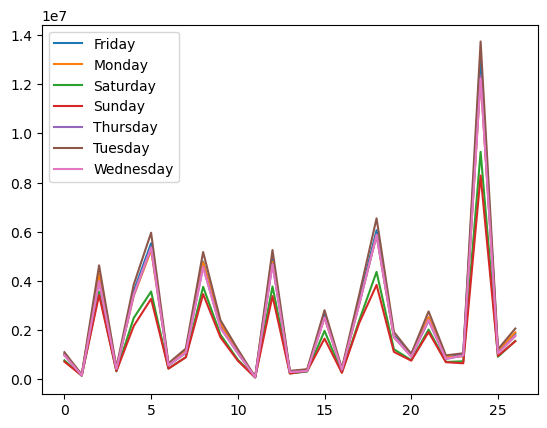

In [64]:
_lineByDoW.plot()

In [65]:
_lineByDoW.reset_index(drop=True, inplace=True)

_lineByDoW.head()

,line,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,일산선,1030223,1007750,769935,715312,974853,1100666,978743
1,장항선,166348,183524,140637,151078,162542,191200,157804
2,경부선,4221850,4296970,3558895,3423586,3975737,4632494,3989080
3,우이신설선,415283,437874,321994,331804,413185,484606,419434
4,분당선,3590760,3394069,2496628,2170127,3431590,3855469,3454879


### 요일별 노선별로 데이터 Transpose (line을 Column으로)

In [66]:
_lineByDoW.drop('line', axis=1).transpose()

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
Friday,1030223,166348,4221850,415283,3590760,5535180,582652,1126904,4788871,2230772,...,3230522,6065666,1782141,1028935,2476500,858636,1034655,13052397,1133385,1845803
Monday,1007750,183524,4296970,437874,3394069,5251024,600380,1153238,4761541,2266697,...,3067310,5847289,1708729,945772,2532330,904591,927293,12232205,1163975,1910877
Saturday,769935,140637,3558895,321994,2496628,3568817,436345,897061,3759729,1813111,...,2395504,4366623,1222338,776671,2023514,703470,731294,9254124,914544,1557103
Sunday,715312,151078,3423586,331804,2170127,3272054,432531,892746,3463438,1704277,...,2289526,3838792,1112754,755720,1919945,693547,649966,8291390,950377,1544761
Thursday,974853,162542,3975737,413185,3431590,5338492,560880,1068616,4564427,2095747,...,3056291,5858577,1720810,918231,2378238,822954,964114,12357478,1056803,1757686
Tuesday,1100666,191200,4632494,484606,3855469,5962721,651442,1246793,5176950,2401864,...,3438675,6547565,1924512,1031159,2760681,971387,1057329,13743581,1217329,2063886
Wednesday,978743,157804,3989080,419434,3454879,5367079,571158,1092422,4566075,2083849,...,3047871,5879339,1731888,916891,2414049,834114,969863,12232002,1050130,1768748


<AxesSubplot:>

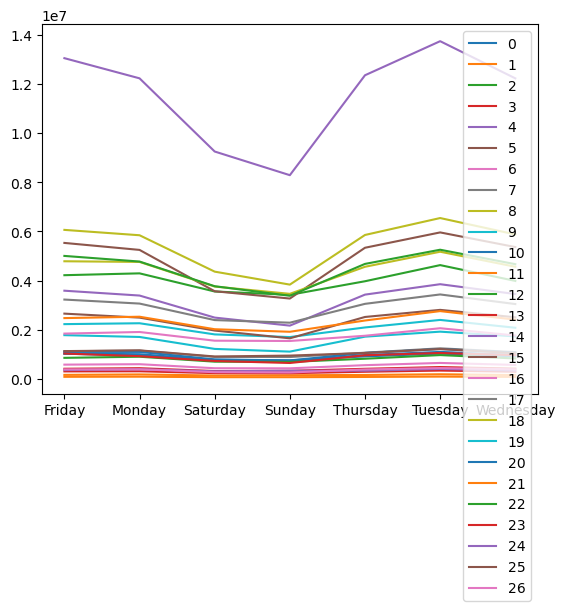

In [67]:
new = _lineByDoW.drop('line', axis=1).transpose()

new.plot()

# 문제: 한국의 코로나바이러스
데이터는 https://www.kaggle.com/kimjihoo/coronavirusdataset%EB%A5%BC 방문하여 TimeProvince.csv를 다운로드해서 사용한다. (열린데이터에서 제공하는 '서울시 코로나19 확진자 현황' (https://data.seoul.go.kr/dataList/OA-20279/S/1/datasetView.do)) 문제를 풀고 결과 출력을 예시해 놓았다. 동일하지 않아도 유사하게 출력하면 된다.

DataFrame 생성하고, 자동인식한 스키마를 출력
3월의 데이터만 출력

### 1) DataFrame 생성

In [68]:
import os
_covidProvinceDf = spark\
    .read\
    .options(header='true', inferschema='true', delimiter=',')\
    .csv(os.path.join('data', 'TimeProvince.csv'))

_covidProvinceDf.printSchema()

root
 |-- date: date (nullable = true)
 |-- time: integer (nullable = true)
 |-- province: string (nullable = true)
 |-- confirmed: integer (nullable = true)
 |-- released: integer (nullable = true)
 |-- deceased: integer (nullable = true)



### 2) 일자 형변환

In [69]:
from pyspark.sql.types import DateType

_covidProvinceDf = _covidProvinceDf.withColumn('Date', _covidProvinceDf['date'].cast(DateType()))

_covidProvinceDf.show(3)

+----------+----+--------+---------+--------+--------+
|      Date|time|province|confirmed|released|deceased|
+----------+----+--------+---------+--------+--------+
|2020-01-20|  16|   Seoul|        0|       0|       0|
|2020-01-20|  16|   Busan|        0|       0|       0|
|2020-01-20|  16|   Daegu|        0|       0|       0|
+----------+----+--------+---------+--------+--------+
only showing top 3 rows



In [70]:
# 3월만 선별
import pyspark.sql.functions as F
_covidProvinceDf.filter(F.month(_covidProvinceDf["Date"]) == '03').show(3)

+----------+----+--------+---------+--------+--------+
|      Date|time|province|confirmed|released|deceased|
+----------+----+--------+---------+--------+--------+
|2020-03-01|  16|   Seoul|       87|      11|       0|
|2020-03-01|  16|   Busan|       83|       0|       0|
|2020-03-01|  16|   Daegu|     2704|       6|      11|
+----------+----+--------+---------+--------+--------+
only showing top 3 rows



In [71]:
# 2월 1일 이후만 선별
_covidProvinceDf.filter(_covidProvinceDf["Date"] > '2020-02-01').show(3)

+----------+----+--------+---------+--------+--------+
|      Date|time|province|confirmed|released|deceased|
+----------+----+--------+---------+--------+--------+
|2020-02-02|  16|   Seoul|        5|       0|       0|
|2020-02-02|  16|   Busan|        0|       0|       0|
|2020-02-02|  16|   Daegu|        0|       0|       0|
+----------+----+--------+---------+--------+--------+
only showing top 3 rows



### 3) 년x월별 건수

In [72]:
import pyspark.sql.functions as F

_covidProvinceDf=_covidProvinceDf\
    .withColumn("year", F.year("Date"))\
    .withColumn("month", F.month("Date"))

In [73]:
# year을 행 인덱스로, month를 pivot column으로
_covidProvinceDf.groupBy("year").pivot("month").count().show() 

+----+---+---+---+---+---+---+
|year|  1|  2|  3|  4|  5|  6|
+----+---+---+---+---+---+---+
|2020|204|493|527|510|527|510|
+----+---+---+---+---+---+---+



### 4) 도x월별 건수

In [74]:
_covidProvinceDf.groupBy("province").pivot("month").count().show()

+-----------------+---+---+---+---+---+---+
|         province|  1|  2|  3|  4|  5|  6|
+-----------------+---+---+---+---+---+---+
|           Sejong| 12| 29| 31| 30| 31| 30|
|            Ulsan| 12| 29| 31| 30| 31| 30|
|Chungcheongbuk-do| 12| 29| 31| 30| 31| 30|
|       Gangwon-do| 12| 29| 31| 30| 31| 30|
|          Gwangju| 12| 29| 31| 30| 31| 30|
| Gyeongsangbuk-do| 12| 29| 31| 30| 31| 30|
|            Daegu| 12| 29| 31| 30| 31| 30|
| Gyeongsangnam-do| 12| 29| 31| 30| 31| 30|
|          Incheon| 12| 29| 31| 30| 31| 30|
|          Jeju-do| 12| 29| 31| 30| 31| 30|
|      Gyeonggi-do| 12| 29| 31| 30| 31| 30|
|            Busan| 12| 29| 31| 30| 31| 30|
|          Daejeon| 12| 29| 31| 30| 31| 30|
|            Seoul| 12| 29| 31| 30| 31| 30|
|Chungcheongnam-do| 12| 29| 31| 30| 31| 30|
|     Jeollabuk-do| 12| 29| 31| 30| 31| 30|
|     Jeollanam-do| 12| 29| 31| 30| 31| 30|
+-----------------+---+---+---+---+---+---+



### 5) 도별 확진자 순위

In [75]:
from pyspark.sql.window import Window
from pyspark.sql import functions as F

# 순위를 매기기 위해서는 Window가 매우 편하다.
confirmedByProvince = Window().partitionBy(['province']).orderBy(F.desc('confirmed'))
_covidProvinceDf.withColumn("rank", F.rank().over(confirmedByProvince)).show(3)

+----------+----+--------+---------+--------+--------+----+-----+----+
|      Date|time|province|confirmed|released|deceased|year|month|rank|
+----------+----+--------+---------+--------+--------+----+-----+----+
|2020-06-30|   0|   Busan|      154|     142|       3|2020|    6|   1|
|2020-06-29|   0|   Busan|      153|     143|       3|2020|    6|   2|
|2020-06-24|   0|   Busan|      152|     142|       3|2020|    6|   3|
+----------+----+--------+---------+--------+--------+----+-----+----+
only showing top 3 rows



## 6) 도별 첫 확진자 출현 (모든 도 출력)

도별로 확진자가 언제 처음 발생하는지 알아보려면:

- confirmed 0을 제외(확진자 0)
- groupBy(province) 도별로 구분하고, 일자 정렬 (첫 확진자를 인식하도록)
- province window의 row_number 1번만 출력

In [76]:
_confirmedGt0=_covidProvinceDf.filter(F.col('confirmed') > 0)
_confirmedGt0.show()

+----------+----+-----------+---------+--------+--------+----+-----+
|      Date|time|   province|confirmed|released|deceased|year|month|
+----------+----+-----------+---------+--------+--------+----+-----+
|2020-01-20|  16|    Incheon|        1|       0|       0|2020|    1|
|2020-01-21|  16|    Incheon|        1|       0|       0|2020|    1|
|2020-01-22|  16|    Incheon|        1|       0|       0|2020|    1|
|2020-01-23|  16|    Incheon|        1|       0|       0|2020|    1|
|2020-01-24|  16|    Incheon|        1|       0|       0|2020|    1|
|2020-01-24|  16|Gyeonggi-do|        1|       0|       0|2020|    1|
|2020-01-25|  16|    Incheon|        1|       0|       0|2020|    1|
|2020-01-25|  16|Gyeonggi-do|        1|       0|       0|2020|    1|
|2020-01-26|  16|    Incheon|        1|       0|       0|2020|    1|
|2020-01-26|  16|Gyeonggi-do|        2|       0|       0|2020|    1|
|2020-01-27|  16|      Seoul|        1|       0|       0|2020|    1|
|2020-01-27|  16|    Incheon|     

In [77]:
from pyspark.sql.functions import row_number

dateByProvince = Window().partitionBy(['province']).orderBy('date')
_confirmedGt0ByProvince=_confirmedGt0.withColumn("row_number", row_number().over(dateByProvince))

_confirmedGt0ByProvince.where(F.col("row_number")==1).show()

+----------+----+-----------------+---------+--------+--------+----+-----+----------+
|      Date|time|         province|confirmed|released|deceased|year|month|row_number|
+----------+----+-----------------+---------+--------+--------+----+-----+----------+
|2020-02-20|  16|            Busan|        8|       0|       0|2020|    2|         1|
|2020-02-21|  16|Chungcheongbuk-do|        1|       0|       0|2020|    2|         1|
|2020-02-21|  16|Chungcheongnam-do|        1|       0|       0|2020|    2|         1|
|2020-02-18|  16|            Daegu|        1|       0|       0|2020|    2|         1|
|2020-02-22|  16|          Daejeon|        2|       0|       0|2020|    2|         1|
|2020-02-22|  16|       Gangwon-do|        6|       0|       0|2020|    2|         1|
|2020-02-04|  16|          Gwangju|        1|       0|       0|2020|    2|         1|
|2020-01-24|  16|      Gyeonggi-do|        1|       0|       0|2020|    1|         1|
|2020-02-19|  16| Gyeongsangbuk-do|        2|       1|

### 7) 주간단위의 평균
현재 시점으로 지난 7일간을 구간으로 설정하여 평균을 계산해보자.

In [78]:
from pyspark.sql.window import Window

# 도 별로 date로 order하는 윈도우 함수
# 현재 행부터 6개의 행 전까지의 범위를 윈도우 프레임으로 지정
dateByProvince = Window().partitionBy(['province']).orderBy('date').rowsBetween(-6,0)
timeprovinceWithRoll = _covidProvinceDf.withColumn("roll_7_confirmed",F.mean("confirmed").over(dateByProvince))


timeprovinceWithRoll.filter(timeprovinceWithRoll.Date>'2020-03-10').show(3)

+----------+----+--------+---------+--------+--------+----+-----+-----------------+
|      Date|time|province|confirmed|released|deceased|year|month| roll_7_confirmed|
+----------+----+--------+---------+--------+--------+----+-----+-----------------+
|2020-03-11|   0|   Busan|       98|      21|       0|2020|    3|95.57142857142857|
|2020-03-12|   0|   Busan|       99|      29|       0|2020|    3|96.57142857142857|
|2020-03-13|   0|   Busan|      100|      36|       0|2020|    3|97.28571428571429|
+----------+----+--------+---------+--------+--------+----+-----+-----------------+
only showing top 3 rows



# 문제 S-2: Spark Dataframe으로 균등분포, 정규분포의 기본 통계 값을 계산.

In [79]:
_df = spark.range(0, 30)
_df.show(5)

+---+
| id|
+---+
|  0|
|  1|
|  2|
|  3|
|  4|
+---+
only showing top 5 rows



In [80]:
from pyspark.sql.window import Window
import sys
from pyspark.sql.functions import rand, randn
from pyspark.sql import functions as F


# 균등, 정규분포 컬럼생성
colUniform = rand(seed=10).alias("uniform")
colNormal = randn(seed=27).alias("normal")

# 묶어서 데이터프레임 생성
_df = _df.select("id", colUniform, colNormal)

# 통계 계산
byAll = Window.rowsBetween(-sys.maxsize, sys.maxsize)
_df = _df.withColumn("meanN", F.avg(_df['normal']).over(byAll))
_df = _df.withColumn("stddevN", F.stddev(_df['normal']).over(byAll))
_df = _df.withColumn("zscoreN", (F.col('normal') - F.col('meanN'))/F.col('stddevN'))
_df.show(3)


+---+------------------+-------------------+-------------------+------------------+-------------------+
| id|           uniform|             normal|              meanN|           stddevN|            zscoreN|
+---+------------------+-------------------+-------------------+------------------+-------------------+
|  0|0.1709497137955568|-0.8664700627108758|-0.0526632301286973|1.0637064308067905|-0.7650671360188446|
|  1|0.8051143958005459|-0.5970491018333267|-0.0526632301286973|1.0637064308067905|-0.5117820631127786|
|  2|0.5775925576589018|0.18267161219540898|-0.0526632301286973|1.0637064308067905| 0.2212404057251131|
+---+------------------+-------------------+-------------------+------------------+-------------------+
only showing top 3 rows



23/12/08 15:08:22 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/12/08 15:08:22 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/12/08 15:08:22 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


# 기본 통계
각 컬럼별로 통계 값을 계산할 수 있다.

In [81]:
_df.drop("meanN").drop("stddevN").describe().show()

+-------+-----------------+--------------------+-------------------+--------------------+
|summary|               id|             uniform|             normal|             zscoreN|
+-------+-----------------+--------------------+-------------------+--------------------+
|  count|               30|                  30|                 30|                  30|
|   mean|             14.5|  0.5003518248858122|-0.0526632301286973|1.850371707708594...|
| stddev|8.803408430829505|  0.2879269232019638| 1.0637064308067905|                 1.0|
|    min|                0|0.014097110603182639| -2.152050408741013|  -1.973652802888473|
|    max|               29|  0.9701253460019921|  1.669616371300714|   1.619130571696471|
+-------+-----------------+--------------------+-------------------+--------------------+



23/12/08 15:08:22 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/12/08 15:08:22 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/12/08 15:08:22 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


<hr><hr>

# <추론>
지금까지 평균, 표준편차, zscore, cdf와 같은 통계량을 계산해보았다.
통계추론은 이러한 통계량을 통해 1) 모집단의 특성을 추측하거나, 2) 가설을 검증하는 것을 말한다.   
ex) 신뢰구간..

## Kolmogorov-Smirnov 검정 -> 비모수추정
- 비모수추정 : 모집단의 특성을 모르는 경우
- Kolmogorov. : 통계량을 통해 데이터가 정규분포와 차이가 있는지 비교한다.

In [82]:
from pyspark.mllib.stat import Statistics #RDD는 pyspark.mllib.stat (Dataframe은 ml)

xRdd = spark.sparkContext.parallelize([1.0, 2.0, 5.0, 4.0, 3.0, 3.3, 5.5])
testResult = Statistics.kolmogorovSmirnovTest(xRdd, "norm")
print(testResult)

# Very strong presumption against null hypothesis : 귀무가설(정규분포를 가질 것이다)를 기각

Kolmogorov-Smirnov test summary:
degrees of freedom = 0 
statistic = 0.841344746068543 
pValue = 5.06089025353873E-6 
Very strong presumption against null hypothesis: Sample follows theoretical distribution.


### scipy Kolmogorov-Smirnov
SciPy는 Python numpy 기반으로 통계,선형대수 연산, 미적분 등 관련 많이 쓰이는 라이브러리

In [83]:
from scipy.stats import kstest

kstest([1.0, 2.0, 5.0, 4.0, 3.0, 3.3, 5.5], 'norm') #정규분포와 비교

KstestResult(statistic=0.8413447460685429, pvalue=5.060890253444183e-06)

In [84]:
kstest([1.0, 2.0, 5.0, 4.0, 3.0, 3.3, 5.5], [11.0, 12.0, 15.0, 14.0, 13.0, 13.3, 15.5]) #오른쪽 친구와 비교

KstestResult(statistic=1.0, pvalue=0.0005827505827505828)

In [85]:
kstest(np.array([1.0, 2.0, 5.0, 4.0, 3.0, 3.3, 5.5]), np.array([1.1, 2.1, 5.1, 4.1, 3.1, 3.4, 5.6]))

KstestResult(statistic=0.14285714285714285, pvalue=0.9999609537692629)

## ANOVA
ANOVA one-way analysis of variance는 2개 이상의 독립된 그룹 간의 평균에 통계적으로 유의미한 차이가 있는지 판단하는 기법.    
ANOVA는 SPSS, SAS, R 등에서는 지원되고 있지만, Spark에는 ANOVA 모듈이 없다. Python에서는 statsmodel을 사용하면 된다.

In [86]:
import statsmodels.api as sm

moore=sm.datasets.get_rdataset("Moore","carData") #샘플데이터셋
moore.data.head()

,partner.status,conformity,fcategory,fscore
0,low,8,low,37
1,low,4,high,57
2,low,8,high,65
3,low,7,low,20
4,low,10,low,36


In [87]:
moore.data.columns=['status','conformity', 'fcategory', 'fscore'] #컬럼명 리네이밍
moore.data.columns

Index(['status', 'conformity', 'fcategory', 'fscore'], dtype='object')

#### fit() : 모델 적용

In [88]:
# R 스타일 모델링
# R 스타일에 따라 종속변수 fscore, 독립변수 status, fcategory로 모델링한다. 이때 명목변수는 C() 연산자를 사용한다.
from statsmodels.formula.api import ols

formula='fscore~C(status)*C(fcategory)'
model=ols(formula, data=moore.data).fit()

ANOVA는 2개 이상의 그룹의 평균에 차이가 있는지 비교할 때 사용한다. 독립변수의 수가 1개 이면 one-way, 2개 이면 two-way ANOVA라고 한다.

귀무가설은 그룹의 평균에는 서로 차이가 없다.
= 대체가설은 그룹의 평균에는 서로 차이가 있다.

In [89]:
from statsmodels.stats.anova import anova_lm

result = anova_lm(model)
result

# fcategory의 PR이 0.05보다 적다. 즉 fcategory high, low, medium의 그룹 간 유의미하게 평균의 차이가 있다는 의미이다. 
# 그외 status 변인, 그리고 상호작용 status x fcategory는 유의하지 않다.


,df,sum_sq,mean_sq,F,PR(>F)
C(status),1.0,7.932587,7.932587,0.231555,6.330623e-01
C(fcategory),2.0,7561.365635,3780.682818,110.359336,8.768957e-17
C(status):C(fcategory),2.0,29.086807,14.543403,0.424527,6.570656e-01
Residual,39.0,1336.059416,34.257934,NaN,NaN


In [90]:
moorePd.groupby('fcategory')['fscore'].mean() # 평균 구하기

NameError: name 'moorePd' is not defined

In [ ]:
moorePd.boxplot()

In [ ]:
_fscore = moorePd.groupby('fcategory')['fscore'].mean()
_fscore.plot(x="fcategory", y=_fscore,  title="fscore by fcategory")

# <빈도 분석>
명목변수별로 빈도를 계산하고 차이 계산   
명목변수 : 문자로 표현되는 변수, 명목변수에 대해서는 평균, 표준편차와 같은 통계량을 계산하는 것은 의미가 없다.

In [ ]:
names = ["kim","lee","park","lim"]
items = ["espresso","latte","americano","affocato","long black","macciato"]

# 500개의 데이터 임의로 만들기
coffeeDf = spark.createDataFrame([(names[i%4], items[i%6]) for i in range(500)],\
                           ["name","coffee"])

In [ ]:
#명목변수는 통계량 무의미
coffeeDf.describe().show()

In [ ]:
# crosstab
coffeeDf.groupBy('name').pivot('coffee').count().show()
coffeeDf.stat.crosstab("name", "coffee").show()

In [ ]:
# freqItems()
freq = coffeeDf.stat.freqItems(["name","coffee"], 0.5)
freq.show()

## Chi Square
Chi-Square 테스트는 label와 features 서로 상관관계가 있는지 검증하는 비모수 추정방법이다. feature의 발생이 label과 어떤 관련이 있는지 추정하는 것이다. 단 label, features 모두 명목변수이어야 한다.

In [ ]:
coffeeDf.printSchema()

### 1. label을 수로 변환 (이름 -> Label(실수))
label, features 모두 명목변수이지만, 문자가 아니라 수와 벡터로 각 각 변환되어야 한다.

In [ ]:
from pyspark.ml.feature import StringIndexer #Dataframe 전용 <-> mllib

coffeeDf.printSchema()
labelIndexer = StringIndexer(inputCol="name", outputCol="label")
model=labelIndexer.fit(coffeeDf) #모델 적용!
_coffeeDf=model.transform(coffeeDf) #변환!


_coffeeDf.printSchema()
_coffeeDf.show(4)

### 2. Feature를 벡터로 변환

In [ ]:
featureIndexer = StringIndexer(inputCol="coffee", outputCol="_features")
model=featureIndexer.fit(_coffeeDf)
_coffeeDf=model.transform(_coffeeDf)

In [ ]:
from pyspark.ml.feature import VectorAssembler

va = VectorAssembler(inputCols=["_features"], outputCol="features")
_coffeeDf = va.transform(_coffeeDf)

In [ ]:
# 다음은 수를 벡터로 변환한다. inputCols에는 리스트를 적어준다
_coffeeDf.printSchema()
_coffeeDf.show(5)

### 3. ChiSquateTest

In [ ]:
from pyspark.ml.stat import ChiSquareTest
r = ChiSquareTest.test(_coffeeDf, "features", "label")

r.show()

# 상관관계
상관관계는 변수 간에 서로 어떤 관계가 있는지, 그 변화의 방향, 강도를 나타낸다.

연속 변수들이 서로 커지거나 작아지거나 하는 의미를 관계를 표현한다.

명목변수와의 상관관계를 계산하는 것은 의미가 있지 않고, 앞서 배웠던 빈도분석을 하는 것이 좋겠다.

단, 서로 상관관계가 있다고 해서 인과관계가 있다는 의미는 아니다.

키와 몸무게가 서로 상관관계가 있다고 하자. 키가 원인이 되어서 몸무게가 결과로 올라간다고 가정해서는 안된다는 것이다. 담배와 암의 상관관계의 상관관계 높다. 그리고 담배가 암을 유발하는 관계이지만, 이러한 방향을 말해주는 것은 아니다.

맥주와 선풍기의 매출은 서로 상관관계가 있다. 그렇다고 해서 선풍기의 매출이 원인이 되어 맥주의 매출을 올린 것은 아니다. 더워져서 선풍기와 맥주의 매출이 올라간 것으로 이해해야 한다. 또 교통상황과 약속지체는 상관관계가 있다. 교통이 막히면 약속이 늦어지는 것은 맞다. 그렇다고 해서 약속이 늦어진다고 교통이 막히는 것은 아니다.

- (+)변수가 서로 같은 방향으로 변동, 숫자가 클수록 강도가 크며 반대로 적을수록 적다.
- 0 변수가 서로 영향을 주지 않음
- (-) 변수가 서로 다른 방향으로 변동

### 상관관계는 공분산 covariance를 표준편차의 곱으로 나눈 값으로 계산한다.

In [91]:
X=[10,7,12,12,9,16,12,18,8,12,14,16]
Y=[6,4,7,8,10,7,10,15,5,6,11,13]

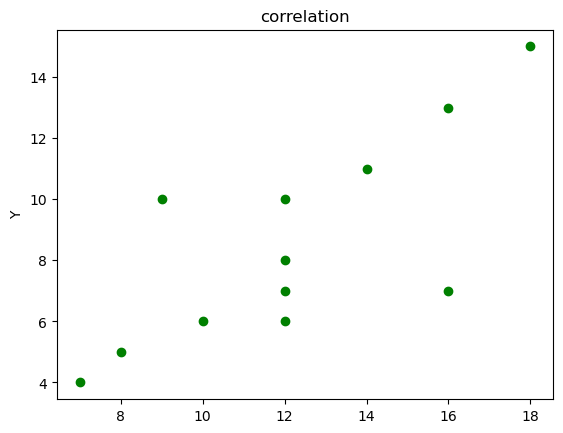

In [92]:
%matplotlib inline

from matplotlib import pyplot as plt

plt.title('correlation')
plt.plot(X, Y, 'go')
plt.ylabel('Y')

plt.show()

### Scatter
X, Y 변수의 상관관계를 산포해보자.

findfont: Font family ['Apple Gothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Apple Gothic'] not found. Falling back to DejaVu Sans.


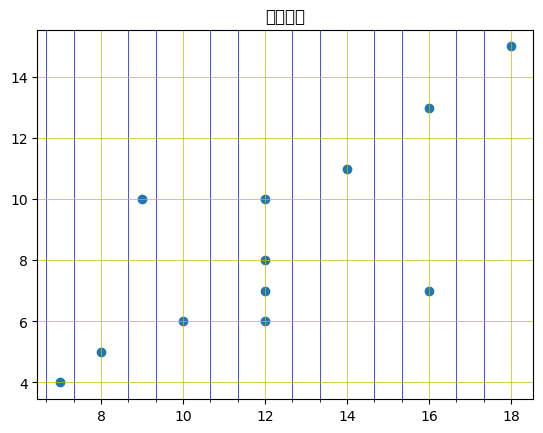

In [94]:
import matplotlib as mpl
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1) # 1x1
ax.title.set_text('Corelation')
ax.scatter(X, Y)
ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator(1)) #y 보조 눈금 죄소값
ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator(3)) #x 보조 눈금 최소값
ax.grid(which='major', color='y', linewidth=0.5)
ax.grid(which='minor', color='b', linewidth=0.5)

### Numpy 공분산 계산
공분산의 부호는 두 변수가 같은 방향으로 움직이는지 여부를 파악한다. '0'일 시 독립적관계   
자기 자신과의 관계를 표현하는 요소와, 다른 요소와의 관계를 표현하는 요소로 벡터 형태로 결과

In [95]:
print ("np cov=\n",np.cov(X,Y))

np cov=
 [[11.42424242  8.45454545]
 [ 8.45454545 11.18181818]]


In [96]:
print (np.sum( (X-np.mean(X))**2) / (len(X)-1))
print (np.sum( (Y-np.mean(Y))**2) / (len(Y)-1))

11.424242424242424
11.181818181818182


In [98]:
# 자신에 대한 공분산
print ("npcov of X", np.cov(X)) #sum( [ (x-xbar)**2 for x in X ])/(len(X)-1)
print ("npcov of Y", np.cov(Y))

npcov of X 11.424242424242424
npcov of Y 11.181818181818182


# 상관관계

상관관계는 공분산을 표준편차의 곱으로 나누어서 계산한다.

In [100]:
import numpy as np

xbar=np.mean(X)
ybar=np.mean(Y)
sx=np.sqrt(np.var(X,ddof=1))
sy=np.sqrt(np.var(Y,ddof=1))
covxy=sum( [ (x-xbar)*(y-ybar) for x,y in zip(X,Y) ]) / (len(X)-1)
rxy=covxy/(sx*sy)
print ("corr: ",rxy)

corr:  0.7480322896763185


## 상관관계(ZScore 이용)

In [102]:
from scipy.stats import skew

print(sum (stats.zscore(X) * stats.zscore(Y))/len(X))

0.7480322896763183


# scipy
### 상관관계 계산 라이브러리  

scipy 라이브러리를 사용하여 pearson 상관관계를 계산해보자. 상관관계는 앞서 계산과 동일하며, 양측 확률이 같이 출력되고 있다 (two-tailed p-value).

Pearson 상관관계는 정규분포인 경우,
Spearman 상관관계는 정규분포가 아닌 경우 사용한다.

In [107]:
import scipy.stats as stats

import numpy as np
xx=np.random.normal(0,1,100)
yy=np.random.normal(0,1,100)

# statistic : 관계의 강함
# pvalue : 통계적 신뢰도 (0.05)

In [109]:
stats.pearsonr(X,Y) #정규분포 따르는 경우(연속변수+표본(N>30)+중심극한정리 만족)

PearsonRResult(statistic=0.7480322896763183, pvalue=0.0051443764140137495)

In [110]:
stats.spearmanr(xx,yy) #정규분포 아닌 경우

SpearmanrResult(correlation=-0.02856285628562856, pvalue=0.7778706205347498)

In [111]:
# 비모수 추저방법으로 등위에 의한 상관관계(위와 결과 유사)
stats.kendalltau(xx,yy)

KendalltauResult(correlation=-0.0197979797979798, pvalue=0.7703971506010628)

## Spark로 상관관계 파악하기
컬럼 서로간의 상관관계 계산하기

In [112]:
from pyspark.sql.functions import rand

df = spark.range(0, 10).withColumn('rand1', rand(seed=10)).withColumn('rand2', rand(seed=27))
print (df.stat.corr('rand1', 'rand2'))

0.13506684062243296


# 상관관계 표

In [113]:
import numpy as np

a=np.array([0.1, .32, .2, 0.4, 0.8])
b=np.array([.23, .18, .56, .61, .12])
c=np.array([.9, .3, .6, .5, .3])
d=np.array([.34, .75, .91, .19, .21])

In [114]:
np.corrcoef([a,b,c,d])

# 자기 자신과는 1, 대칭행렬, 0.74는 상다히 큰 관계, 0.15 : 흩어져 있는 관계

array([[ 1.        , -0.35153114, -0.74736506, -0.48917666],
       [-0.35153114,  1.        ,  0.23810227,  0.15958285],
       [-0.74736506,  0.23810227,  1.        , -0.03960706],
       [-0.48917666,  0.15958285, -0.03960706,  1.        ]])

<hr>

# 문제 : 키, 몸무게 상관관계

In [115]:
from pyspark.sql.types import StructType, StructField, StringType, DoubleType

_schema = StructType([
    StructField("id", StringType(), True),
    StructField("height", DoubleType(), True),
    StructField("weight", DoubleType(), True)
])

### 1. DataFrame 생성

In [116]:
import os
tDf = spark\
    .read\
    .options(header='false', delimiter='\t')\
    .schema(_schema)\
    .csv(os.path.join('data', 'ds_spark_heightweight.txt'))

In [118]:
tDf.printSchema()

tDf.show(3)

root
 |-- id: string (nullable = true)
 |-- height: double (nullable = true)
 |-- weight: double (nullable = true)

+---+------+------+
| id|height|weight|
+---+------+------+
|  1| 65.78|112.99|
|  2| 71.52|136.49|
|  3|  69.4|153.03|
+---+------+------+
only showing top 3 rows



### 2. BMI 컬럼 생성

In [119]:
from pyspark.sql import functions as F

_tDf = tDf.withColumn("bmi", 703 * F.col('weight') / F.pow(F.col('height'), 2))


_tDf.show(3)

+---+------+------+------------------+
| id|height|weight|               bmi|
+---+------+------+------------------+
|  1| 65.78|112.99|18.357248855814564|
|  2| 71.52|136.49| 18.75863128975672|
|  3|  69.4|153.03| 22.33638889119584|
+---+------+------+------------------+
only showing top 3 rows



### 3. BMI 구분별 건수

In [120]:
def getBmi(bmi):
    category = "";
    if bmi < 18.5:
        category = "underweight"
    elif bmi >= 18.5 and bmi < 25:
        category = "normal"
    elif bmi >= 25 and bmi < 30:
        category = "overweight"
    elif bmi >= 30 and bmi < 35:
        category = "Obese Class I"
    elif bmi >= 35 and bmi < 40:
        category = "Obese Class II"
    elif bmi >= 40:
        category = "Obese Class III"
    else:
        category = "error"
    return category

getBmiUdf = F.udf(lambda x: getBmi(x), StringType())

In [121]:
_tDf = _tDf.withColumn("bmi category", getBmiUdf('bmi'))
_tDf.groupBy("bmi category").count().show()

+------------+-----+
|bmi category|count|
+------------+-----+
|      normal|   39|
| underweight|   11|
+------------+-----+



### 4. weigth와 height의 Zscore 계산

In [122]:
from pyspark.sql.window import Window
import sys

byAll = Window.rowsBetween(-sys.maxsize, sys.maxsize) #윈도우 함수 범위 지정

In [123]:
from pyspark.sql import functions as F

_tDf = tDf.withColumn("meanW", F.avg(tDf['weight']).over(byAll)) # 평균
_tDf = _tDf.withColumn("stddevW", F.stddev(_tDf['weight']).over(byAll)) # 표준 편차
# X - Mean / Stddev(표준편차)
_tDf = _tDf.withColumn("zscoreW", (F.col('weight')-F.col('meanW'))/F.col('stddevW'))
_tDf.show(3)

+---+------+------+-------+------------------+-------------------+
| id|height|weight|  meanW|           stddevW|            zscoreW|
+---+------+------+-------+------------------+-------------------+
|  1| 65.78|112.99|128.842|12.888888902572523|-1.2298965504184058|
|  2| 71.52|136.49|128.842|12.888888902572523| 0.5933793097148594|
|  3|  69.4|153.03|128.842|12.888888902572523|   1.87665517042142|
+---+------+------+-------+------------------+-------------------+
only showing top 3 rows



23/12/08 15:52:13 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/12/08 15:52:13 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/12/08 15:52:13 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/12/08 15:52:13 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/12/08 15:52:13 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


In [124]:
from pyspark.sql import functions as F

_tDf = _tDf.withColumn("meanH", F.avg(tDf['height']).over(byAll))
_tDf = _tDf.withColumn("stddevH", F.stddev(_tDf['height']).over(byAll))
_tDf = _tDf.withColumn("zscoreH", (F.col('height')-F.col('meanH'))/F.col('stddevH'))
_tDf.show(3)

+---+------+------+-------+------------------+-------------------+-----------------+------------------+-------------------+
| id|height|weight|  meanW|           stddevW|            zscoreW|            meanH|           stddevH|            zscoreH|
+---+------+------+-------+------------------+-------------------+-----------------+------------------+-------------------+
|  1| 65.78|112.99|128.842|12.888888902572523|-1.2298965504184058|68.05240000000002|1.8239803525615683|-1.2458467531235724|
|  2| 71.52|136.49|128.842|12.888888902572523| 0.5933793097148594|68.05240000000002|1.8239803525615683| 1.9011169693413281|
|  3|  69.4|153.03|128.842|12.888888902572523|   1.87665517042142|68.05240000000002|1.8239803525615683| 0.7388237478037734|
+---+------+------+-------+------------------+-------------------+-----------------+------------------+-------------------+
only showing top 3 rows



23/12/08 15:52:17 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/12/08 15:52:17 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/12/08 15:52:17 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/12/08 15:52:17 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/12/08 15:52:17 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


In [125]:
# 연산 내용 Drop
_tDf.drop("meanW").drop("stddevW").drop("meanH").drop("stddevH").show(3)

+---+------+------+-------------------+-------------------+
| id|height|weight|            zscoreW|            zscoreH|
+---+------+------+-------------------+-------------------+
|  1| 65.78|112.99|-1.2298965504184058|-1.2458467531235724|
|  2| 71.52|136.49| 0.5933793097148594| 1.9011169693413281|
|  3|  69.4|153.03|   1.87665517042142| 0.7388237478037734|
+---+------+------+-------------------+-------------------+
only showing top 3 rows



23/12/08 16:08:23 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/12/08 16:08:23 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/12/08 16:08:23 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/12/08 16:08:23 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/12/08 16:08:23 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


### 5. spark에서 위에 계산한 zscore를 사용하여 상관관계 계산

In [126]:
_tDf.stat.corr('zscoreW', 'zscoreH') #ZScore 합계를 하지 않았기 때문에 N으로 나누지 않는다.

23/12/08 16:12:37 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/12/08 16:12:37 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/12/08 16:12:37 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/12/08 16:12:37 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


0.5925221289063219

### 6. spark correlation using features

속성 Col들을 Vector(Features)로 변환 후 -> Corelation 측정
- Labels : 명목변수
- Features : 연속변수(일반적으로)


In [128]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation

assembler = VectorAssembler(inputCols=['height', 'weight'], outputCol="features")
_trainDf = assembler.transform(_tDf).select("features") #Vector로 Transform
matrix = Correlation.corr(_trainDf, "features")
matrix.show(truncate=False)
matrix.collect()[0][0].toArray()

+----------------------------------------------------------------------------------+
|pearson(features)                                                                 |
+----------------------------------------------------------------------------------+
|1.0                 0.5925221289063218  \n0.5925221289063218  1.0                 |
+----------------------------------------------------------------------------------+



array([[1.        , 0.59252213],
       [0.59252213, 1.        ]])

### 7. scipy를 사용하여 상관관계를 계산

In [129]:
import scipy.stats as stats

weightList=_tDf.select('weight').rdd.flatMap(lambda x:x).collect()
heightList=_tDf.select('height').rdd.flatMap(lambda x:x).collect()
stats.pearsonr(weightList,heightList) #연속변수, 정규분포 -> pearsonr

PearsonRResult(statistic=0.5925221289063218, pvalue=5.808558311242065e-06)

### 8. 그래프

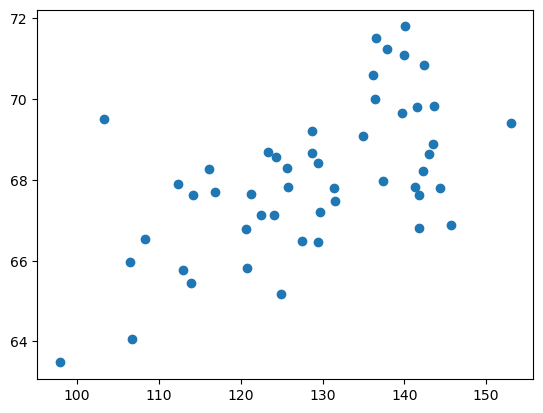

In [130]:
import matplotlib.pyplot as plt

plt.scatter(weightList, heightList)
plt.show()

# 붓꽃 문제

붓꽃 데이터의 상관관계를 알아보자

In [133]:
import seaborn as sns

iris1 = sns.load_dataset("iris")

iris1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [134]:
# ML Repository에서 가져오기
import pandas as pd

file_name = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
iris = pd.read_csv(file_name, names=["sepal_length","sepal_width","petal_length", "petal_width","species"])

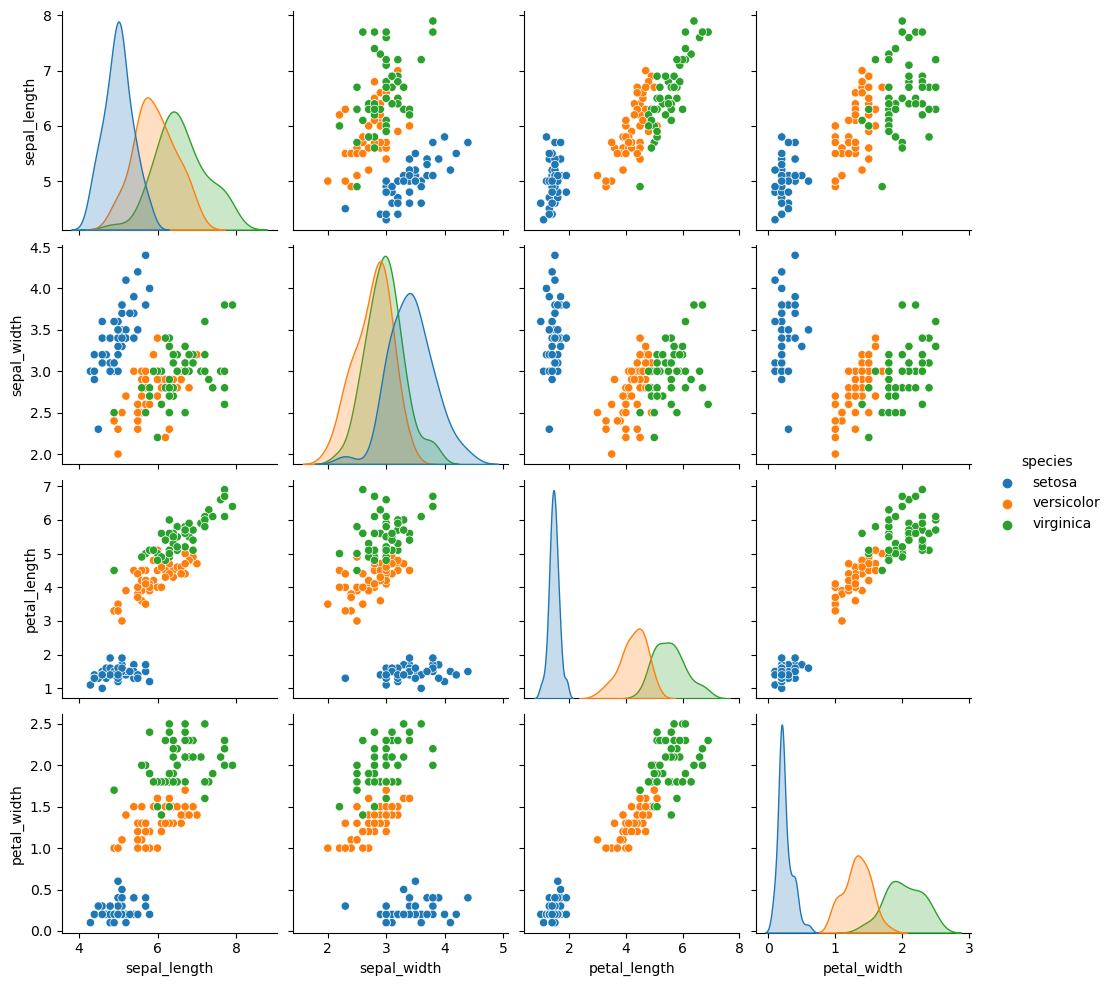

In [135]:
import matplotlib.pyplot as plt

sns.pairplot(iris1, kind="scatter", hue="species")
plt.show()

- 붓꽃의 종류는 Iris setosa, Iris virginica and Iris versicolor -> Label이 된다.
- 속성으로는 sepal 너비, 높이 / petal 너비, 높이를 제공

###  Boxplot을 이용한 Outlier 파악
- 박스는 IQR (Interquartile Range), 즉 25%~75%의 구간을 의미
- 위 아래 가로선은 IQR 값의 1.5배되는 구역
- 2번째 boxplot에서 나타나는 점들은 outlier를 의미한다. outlier는 그 벗어난 정도가 심하지 않으므로 그대로 두기로 한다.

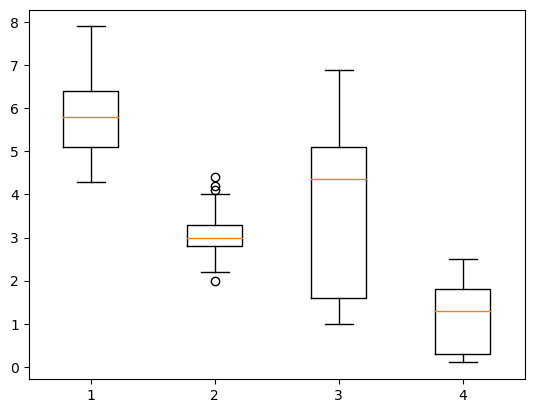

In [136]:
import matplotlib.pyplot as plt

iris4 = [ iris.sepal_length, iris.sepal_width, iris.petal_length, iris.petal_width ]
plt.boxplot(iris4)
plt.show()

### Dataframe 생성

In [137]:
irisDf = spark.createDataFrame(iris)

irisDf.printSchema()

root
 |-- sepal_length: double (nullable = true)
 |-- sepal_width: double (nullable = true)
 |-- petal_length: double (nullable = true)
 |-- petal_width: double (nullable = true)
 |-- species: string (nullable = true)



## 상관관계
상관관계 분석을 위해 속성들을 벡터 형태로 만들어준다.

In [139]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation



assembler = VectorAssembler(inputCols=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
                                       outputCol="features")
df_vector = assembler.transform(irisDf).select("features")

In [140]:
#상관관계 표
matrix.collect()[0][0].toArray()

array([[ 1.        , -0.10936925,  0.87175416,  0.81795363],
       [-0.10936925,  1.        , -0.4205161 , -0.35654409],
       [ 0.87175416, -0.4205161 ,  1.        ,  0.9627571 ],
       [ 0.81795363, -0.35654409,  0.9627571 ,  1.        ]])